In [10]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.0 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##**Baca Dataset**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

In [12]:
df = pd.read_excel('https://github.com/Adkurrr/Tugas-Analisis-Deret-Waktu/blob/main/8.%20Data%20Jumlah%20kendaraan%20perempatan.xlsx?raw=true')
df

,Waktu (Harian),Jumlah Kendaraan
0,1,1559
1,2,1041
2,3,1039
3,4,4328
4,5,4747
...,...,...
725,726,2326
726,727,4660
727,728,2206
728,729,1009


##**Plot Dataset**

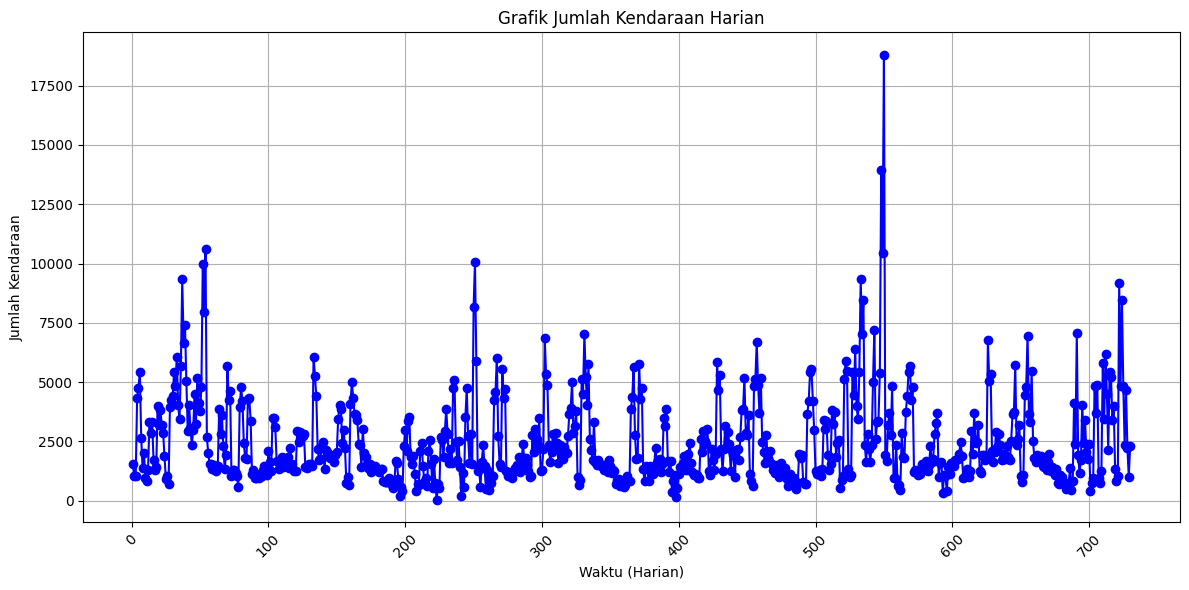

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Waktu (Harian)'], df['Jumlah Kendaraan'], marker='o', linestyle='-', color='b')
plt.title('Grafik Jumlah Kendaraan Harian')
plt.xlabel('Waktu (Harian)')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

##**Uji Augmented Dickey-Fuller (ADF)**

In [14]:
# Memeriksa kestasioneran data menggunakan uji ADF
result = adfuller(df['Jumlah Kendaraan'])

# Output uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretasi hasil uji ADF
if result[1] <= 0.05:
    print("Hasil uji menunjukkan data stasioner (p-value <= 0.05)")
else:
    print("Hasil uji menunjukkan data tidak stasioner (p-value > 0.05)")

ADF Statistic: -3.7644594780156333
p-value: 0.0032926058697809817
Critical Values:
   1%: -3.4395677423210493
   5%: -2.8656078730509784
   10%: -2.5689362152032573
Hasil uji menunjukkan data stasioner (p-value <= 0.05)


Dalam uji Augmented Dickey-Fuller (ADF)

- H0 = data memiliki akar unit, yang berarti data tidak stasioner.
- H1 = data tidak memiliki akar unit yang berarti data stasioner.

Dalam data diatas, ADF Statistic (-3.7644594780156355) kurang dari nilai kritis pada tingkat kepercayaan 1% (-3.4395677423210493). Selain itu, p-value (0.003292605869780964) lebih kecil dari tingkat signifikansi 0.01 (tingkat kepercayaan 99%) yang berarti tolak H0. Oleh karena itu, data tidak memiliki akar unit yang berarti data stasioner.

##**Plot ACF dan PACF**

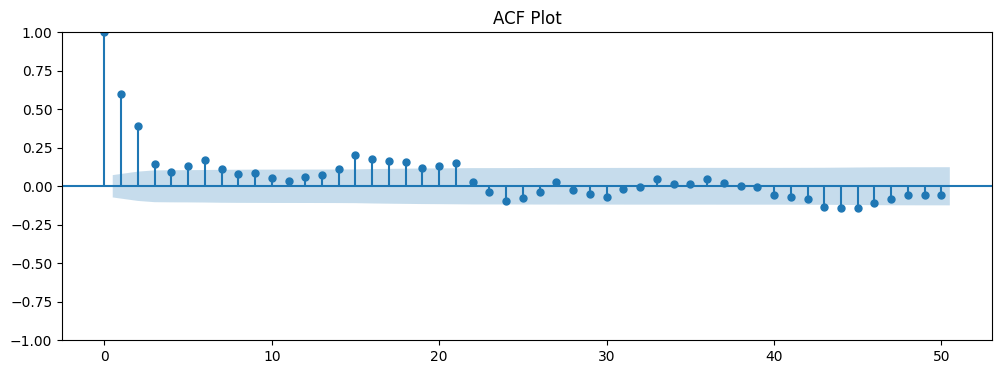

In [15]:
plt.figure(figsize=(12, 4))
plot_acf(df['Jumlah Kendaraan'], lags=50, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

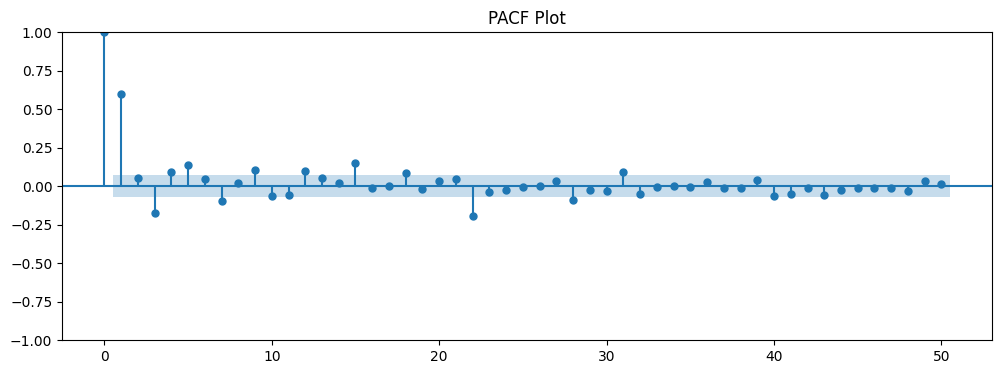

In [16]:
plt.figure(figsize=(12, 4))
plot_pacf(df['Jumlah Kendaraan'], lags=50, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

pada plot ACF dan PACF diatas dapat diketahui bahwa lag 1 signifikan baik pada plot ACF maupun PACF. Oleh karena itu, ordo p dan q yang memungkinkan ialah model ARIMA dengan model ARMA(1,0), ARMA(0,1), dan ARMA(1,1).

##**Mencari Model ARMA Terbaik**





In [17]:
# Menggunakan model ARMA(1,0)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,0))
results_1 = model.fit()

print(results_1.summary())

                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6366.789
Date:                Thu, 07 Dec 2023   AIC                          12739.578
Time:                        14:44:26   BIC                          12753.357
Sample:                             0   HQIC                         12744.894
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    184.242     13.216      0.000    2073.829    2796.045
ar.L1          0.5990      0.013     47.508      0.000       0.574       0.624
sigma2      2.204e+06   5.05e+04     43.663      0.0

In [18]:
# Menggunakan model ARMA(0,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(0,0,1))
results_2 = model.fit()

print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6424.645
Date:                Thu, 07 Dec 2023   AIC                          12855.290
Time:                        14:44:26   BIC                          12869.069
Sample:                             0   HQIC                         12860.606
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    121.599     20.024      0.000    2196.607    2673.267
ma.L1          0.4294      0.021     20.615      0.000       0.389       0.470
sigma2      2.709e+06      7e+04     38.703      0.0

In [19]:
# Menggunakan model ARMA(1,1)
model = sm.tsa.ARIMA(df['Jumlah Kendaraan'], order=(1,0,1))
results_3 = model.fit()

print(results_3.summary())

                               SARIMAX Results                                
Dep. Variable:       Jumlah Kendaraan   No. Observations:                  730
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6366.167
Date:                Thu, 07 Dec 2023   AIC                          12740.334
Time:                        14:44:26   BIC                          12758.706
Sample:                             0   HQIC                         12747.422
                                - 730                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9370    194.591     12.513      0.000    2053.545    2816.329
ar.L1          0.6347      0.028     22.979      0.000       0.581       0.689
ma.L1         -0.0553      0.047     -1.171      0.2

pada hasil perhitungan ARMA diatas didapatkan nilai AIC sebagai berikut:


1.   ARMA(1,0) = 12739.578
2.   ARMA(0,1) = 12855.290
3.   ARMA(1,1) = 12740.334


Model yang terbaik merupakan model yang mempunyai nilai AIC terkecil. Oleh karena itu, model terbaik berada pada model ARMA(1,0)

##**Uji t pada masing-masing parameter**

pada Model ARIMA(1,0,0) dan ARIMA(0,0,1) ternyata t-hitung > t-tabel, dan prob < 0.005 sehingga dengan alpha 5%, H0 ditolak artinya koefisien signifikan. Sementara untuk ARIMA(1,0,1) mempunyai t-hitung < t-tabel, sehingga H0 diterima artinya koefisien tidak signifikan.

##**Pengujian Model Secara Keseluruhan (*Overral F tes*t)**


**Model ARIMA(1,0,0)**

In [20]:
# Rename columns to match the example data
df.rename(columns={'Waktu (Harian)':'TIME', 'Jumlah Kendaraan':'SUNACTIVITY'}, inplace=True)

# Fit ARIMA model to dataset
model = sm.tsa.ARIMA(df['SUNACTIVITY'], order=(1, 0, 0))
res = model.fit()

# Perform Ljung-Box test on residuals with lag=1
lb_test = sm.stats.acorr_ljungbox(res.resid, lags=[1], return_df=True)

# Print the result
print(lb_test)

    lb_stat  lb_pvalue
1  0.663893   0.415189


**Model ARIMA(0,0,1)**

In [21]:
# Rename columns to match the example data
df.rename(columns={'Waktu (Harian)':'TIME', 'Jumlah Kendaraan':'SUNACTIVITY'}, inplace=True)

# Fit ARIMA model to dataset
model = sm.tsa.ARIMA(df['SUNACTIVITY'], order=(0, 0, 1))
res = model.fit()

# Perform Ljung-Box test on residuals with lag=1
lb_test = sm.stats.acorr_ljungbox(res.resid, lags=[1], return_df=True)

# Print the result
print(lb_test)

     lb_stat  lb_pvalue
1  22.209713   0.000002


https://www.statology.org/ljung-box-test-python/

Model ARIMA(1,0,1)

In [22]:
# Rename columns to match the example data
df.rename(columns={'Waktu (Harian)':'TIME', 'Jumlah Kendaraan':'SUNACTIVITY'}, inplace=True)

# Fit ARIMA model to dataset
model = sm.tsa.ARIMA(df['SUNACTIVITY'], order=(1, 0, 1))
res = model.fit()

# Perform Ljung-Box test on residuals with lag=1
lb_test = sm.stats.acorr_ljungbox(res.resid, lags=[1], return_df=True)

# Print the result
print(lb_test)

   lb_stat  lb_pvalue
1  0.01817   0.892772


Pada pengujian model secara keseluruhan menggunakan Uji Ljung-Box didapatkan nilai Q-stat pada model ARIMA(1,0,0) dan ARIMA(0,0,1) lebih besar daripada nilai Kritisnya. Sedangkan untuk model ARIMA(1,0,1) nilai q-stat nya lebih kecil daripada nilai kriterianya.

##**Kesimpulan**

Dengan menggunakan asumsi bahwa model terbaik adalah model yang mempunyai nilai AIC terkecil maka model ARIMA(1,0,0) merupakan model yang memenuhi syarat. Sehingga didapatkan koefisien AR(1) dengan bentuk persamaan:

Yt = 13.216 + 47.508Yt-1 + et